In [1]:
import os
import numpy as np, pandas as pd
from collections import Counter
import matplotlib.pyplot as plt, seaborn as sns
from matplotlib.colors import LogNorm

data_path = 'data'

In [2]:
pd_dataset = pd.read_pickle(os.path.join(data_path,'empirical_dataset.pkl'))

# define datasets and targets
datasets = ['ElSherief2018','Ousidhoum2019','Qian2019Gab','Qian2019Reddit','Mandl2019','Founta2018','Zampieri2019','Bretschneider2017','Basile2019','Gao2018',
            'Waseem2016','Jha2017','Davidson2017','Gibert2018','Wulczyn2017','Overall']

references = ['El Sherief et al. (2018)', 'Ousidhoum et al. (2019)', 'Qian et al. - Gab (2019)', 'Qian et al. - Reddit (2019)', 'Mandl et al. (2019)', 'Founta et al. (2018)',
              'Zampieri et al. (2019)', 'Bretschneider and Peters (2017)', 'Basile et al. (2019)', 'Gao and Huang (2017)', 'Waseem and Hovy (2016)', 'Jha and Mamidi (2017)', 
              'Davidson et al. (2017)','Gibert et al. (2018)', 'Wulczyn et al. (2017)', 'Overall']

targets = ['age','body', 'class','disability','gender','nationality','org/instit','political','race','religion','sexuality','untargeted']


# information on targets claimed in publication, per dataset 
box_dict_unio = {'ElSherief2018': ['class','disability','gender','nationality','race','religion','sexuality'], #7
                 'Ousidhoum2019': ['disability', 'race', 'gender', 'nationality', 'religion', 'sexuality'], #6
                 'Qian2019Gab': ['disability','gender','nationality','race','religion','sexuality'], #6
                 'Qian2019Reddit': ['disability','gender','nationality','race','religion','sexuality'], #6
                 'Mandl2019': ['class','disability','gender','political','race','sexuality'], #6
                 'Founta2018': ['disability','gender','race','religion','sexuality'], #5
                 'Zampieri2019': ['gender','political','race','religion','sexuality'], #5
                 'Bretschneider2017': ['nationality','org/instit','political'], #3
                 'Basile2019': ['gender','nationality','political'], #3
                 'Gao2018': ['race','gender','sexuality'], #3
                 'Waseem2016': ['race','gender'], #2
                 'Jha2017': ['gender'], #1
                 'Davidson2017': ['untargeted'], #0
                 'Gibert2018': ['untargeted'], #0
                 'Wulczyn2017': ['untargeted']} #0


# utility function to add frames to heatmaps 
def add_box(dataset,lcol,rcol,color):
    r = dataset2r[dataset]
    plt.plot([lcol-1,rcol],[r-1,r-1],color=color)
    plt.plot([rcol,rcol],[r-1,r],color=color)
    plt.plot([lcol-1,rcol],[r,r],color=color)
    plt.plot([lcol-1,lcol-1],[r-1,r],color=color)
    
# information column on dataset size and share of hate-labels
dataset_size = [len(pd_dataset[pd_dataset['dataset_name']==dataset]) for dataset in datasets]
dataset_size[-1] = len(pd_dataset)
dataset_size_hate = [len(pd_dataset[(pd_dataset['dataset_name']==dataset)&(pd_dataset['label']==1)]) for dataset in datasets]
dataset_size_hate[-1] = len(pd_dataset[pd_dataset['label']==1])

dataset_share_hate = [np.round(dataset_size_hate[i]/dataset_size[i],4) for i in range(len(dataset_size))]

In [3]:
# create data matrix for heatmap 1, calculating the distribution of instances over target categories
matrix_distribution = []

for dataset in datasets:
    if dataset == 'Overall':
        dataset_hate = pd_dataset[pd_dataset['label']==1]
    else:
        dataset_hate = pd_dataset[(pd_dataset['dataset_name']==dataset)&(pd_dataset['label']==1)]
    n_instances_hate = len(dataset_hate)
    targets_in_dataset = []
    for target in dataset_hate['targets']:
        targets_in_dataset = targets_in_dataset+target if target else targets_in_dataset+['untargeted']
    n_instances_targets = len(targets_in_dataset)
    ct_targets = dict(Counter(targets_in_dataset))
    dist_targets = []
    for target in targets:
        if target in ct_targets.keys():
            dist_targets.append(np.round(ct_targets[target]/n_instances_targets,2))
        else:
            dist_targets.append(0)
    matrix_distribution.append(dist_targets)

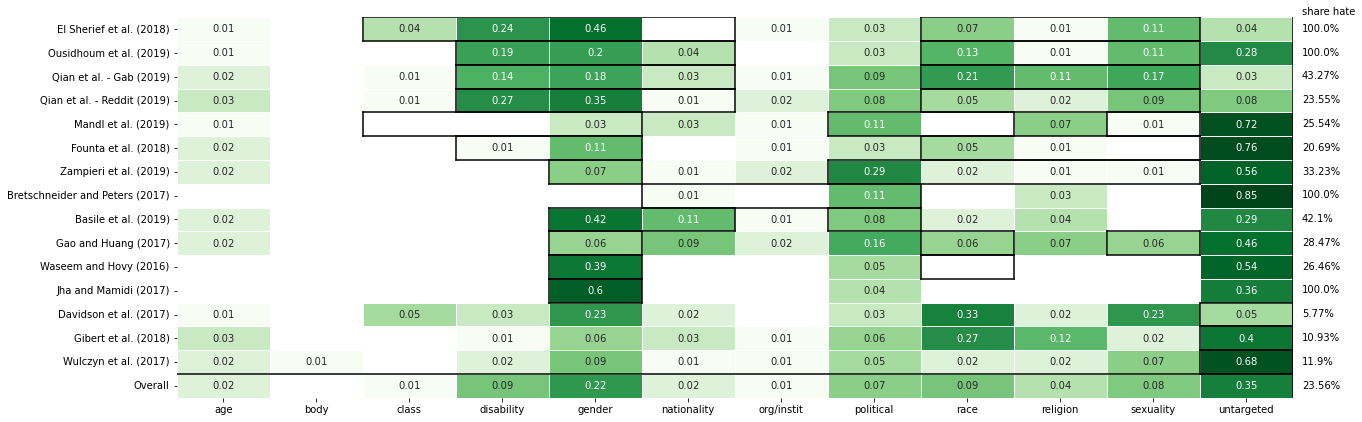

In [4]:
# visualize distribution over target categories
pd_distribution = pd.DataFrame(matrix_distribution, columns=targets)
pd_distribution.index = references

target2c = dict((targets[i],i+1) for i in range(len(targets)))
dataset2r = dict((datasets[i],i+1) for i in range(len(datasets)))

fig, ax1 = plt.subplots(figsize = (20,7))
sns.heatmap(pd_distribution, annot=True, linewidths = 0.5, ax = ax1, cmap = "Greens", vmin=0, vmax=1, fmt="g", cbar=False, norm=LogNorm())

color = 'black'
add_box('ElSherief2018',3,6,color)
add_box('ElSherief2018',9,11,color)
add_box('Ousidhoum2019',4,6,color)
add_box('Ousidhoum2019',9,11,color)
add_box('Qian2019Gab',4,6,color)
add_box('Qian2019Gab',9,11,color)
add_box('Qian2019Reddit',4,6,color)
add_box('Qian2019Reddit',9,11,color)
add_box('Mandl2019',3,5,color)
add_box('Mandl2019',8,9,color)
add_box('Mandl2019',11,11,color)
add_box('Founta2018',4,5,color)
add_box('Founta2018',9,11,color)
add_box('Zampieri2019',5,5,color)
add_box('Zampieri2019',8,11,color)
add_box('Bretschneider2017',6,8,color)
add_box('Basile2019',5,6,color)
add_box('Basile2019',8,8,color)
add_box('Gao2018',5,5,color)
add_box('Gao2018',9,9,color)
add_box('Gao2018',11,11,color)
add_box('Waseem2016',5,5,color)
add_box('Waseem2016',9,9,color)
add_box('Jha2017',5,5,color)
add_box('Davidson2017',12,12,color)
add_box('Gibert2018',12,12,color)
add_box('Wulczyn2017',12,12,color)

plt.plot([0,len(targets)],[len(datasets)-1,len(datasets)-1],color='black')
plt.plot([len(targets),len(targets)],[0,len(datasets)],color='black')
plt.text(len(targets)+0.1,-0.1,'share hate')
for i,n in enumerate(dataset_share_hate):
    plt.text(len(targets)+0.1,0.6+i,f'{str(np.round(n*100,2)).zfill(2)}%')
plt.savefig('figures/heatmap_distribution_unio.png', bbox_inches='tight')

In [5]:
# create data matrix for heatmap 2, calculating the ratio label-hate/label-nohate per target category
matrix_ratio = []

for dataset in datasets:
    if dataset == 'Overall':
        hate_dataset = pd_dataset[pd_dataset['label']==1]
        nohate_dataset = pd_dataset[pd_dataset['label']==0]
    else:
        hate_dataset = pd_dataset[(pd_dataset['label']==1)&(pd_dataset['dataset_name']==dataset)]
        nohate_dataset = pd_dataset[(pd_dataset['label']==0)&(pd_dataset['dataset_name']==dataset)]
    
    targets_hate = []
    for target in hate_dataset['targets']:
        targets_hate = targets_hate+target if target else targets_hate+['untargeted']
        
    targets_nohate = []
    for target in nohate_dataset['targets']:
        targets_nohate = targets_nohate+target if target else targets_nohate+['untargeted']
        
    ct_targets_hate = dict(Counter(targets_hate)) 
    ct_targets_nohate = dict(Counter(targets_nohate))
    
    ratio = []
    for target in targets:
        if not target in ct_targets_hate.keys():
            ratio.append(np.nan)
        elif not target in ct_targets_nohate.keys():
            ratio.append(np.nan)
        else:
            ratio.append(np.round(ct_targets_hate[target]/ct_targets_nohate[target],2))

    matrix_ratio.append(ratio)
    
matrix_ratio = np.array(matrix_ratio)

# transform ratio from value range [0;infinity] to [-infinity;-1] and [1;infinity]
matrix_transformed = matrix_ratio.copy()
for row in range(matrix_transformed.shape[0]):
    for col in range(matrix_transformed.shape[1]):
        if 0 < matrix_ratio[row,col] < 1:
            matrix_transformed[row,col] = np.round(-1/matrix_ratio[row,col],2) # negative values show the reverse ratio; no_hate/hate
            
# center scores at 0 to improve visualization, while retaining correct labels
matrix_test = np.zeros(matrix_transformed.shape)

for i in range(matrix_transformed.shape[0]):
    for j in range(matrix_transformed.shape[1]):
        if matrix_transformed[i,j]:
            if matrix_transformed[i,j] < 0:
                matrix_test[i,j] = matrix_transformed[i,j] + 1
            else:
                matrix_test[i,j] = matrix_transformed[i,j] - 1
        else:
            matrix_test[i,j] = matrix_transformed[i,j]

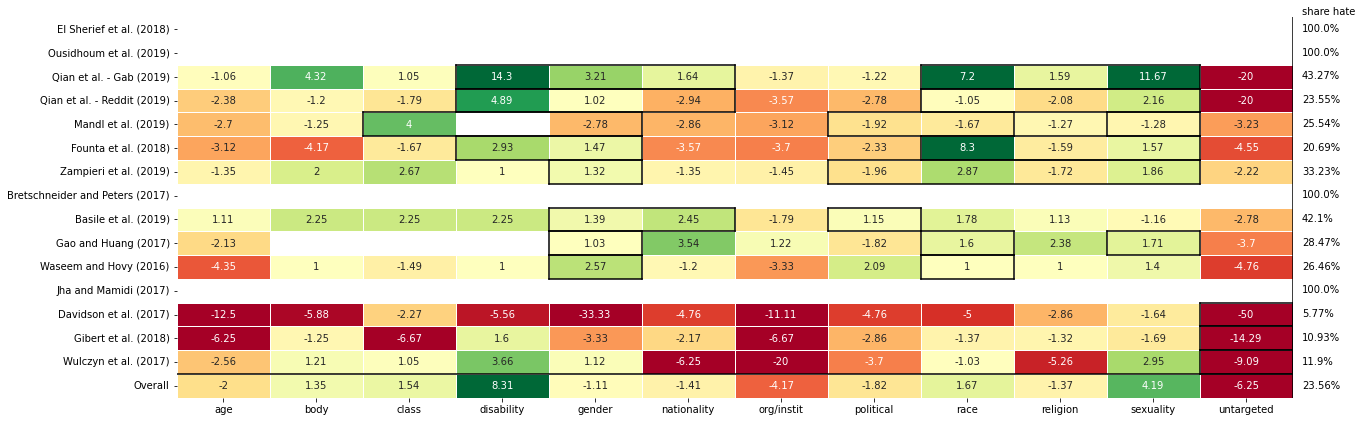

In [6]:
# visualize transformed label-hate/label-nohate ratios
pd_ratio = pd.DataFrame(matrix_test, columns=targets)
pd_ratio.index = references

target2c = dict((targets[i],i+1) for i in range(len(targets)))
dataset2r = dict((datasets[i],i+1) for i in range(len(datasets)))

fig, ax1 = plt.subplots(figsize = (20,7))
sns.heatmap(pd_ratio, annot=matrix_transformed, linewidths = 0.5, ax = ax1, cmap = "RdYlGn", vmin=-5, vmax=5, fmt="g", cbar=False)

color = 'black'
add_box('Qian2019Gab',4,6,color)
add_box('Qian2019Gab',9,11,color)
add_box('Qian2019Reddit',4,6,color)
add_box('Qian2019Reddit',9,11,color)
add_box('Mandl2019',3,5,color)
add_box('Mandl2019',8,9,color)
add_box('Mandl2019',11,11,color)
add_box('Founta2018',4,5,color)
add_box('Founta2018',9,11,color)
add_box('Zampieri2019',5,5,color)
add_box('Zampieri2019',8,11,color)
add_box('Basile2019',5,6,color)
add_box('Basile2019',8,8,color)
add_box('Gao2018',5,5,color)
add_box('Gao2018',9,9,color)
add_box('Gao2018',11,11,color)
add_box('Waseem2016',5,5,color)
add_box('Waseem2016',9,9,color)
add_box('Davidson2017',12,12,color)
add_box('Gibert2018',12,12,color)
add_box('Wulczyn2017',12,12,color)
        
plt.plot([0,len(targets)],[len(datasets)-1,len(datasets)-1],color='black')
plt.plot([len(targets),len(targets)],[0,len(datasets)],color='black')
plt.text(len(targets)+0.1,-0.1,'share hate')
for i,n in enumerate(dataset_share_hate):
    plt.text(len(targets)+0.1,0.6+i,f'{str(np.round(n*100,2)).zfill(2)}%')
plt.savefig('figures/heatmap_ratio_unio.png', bbox_inches='tight')